In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [90]:
dataset=pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [91]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

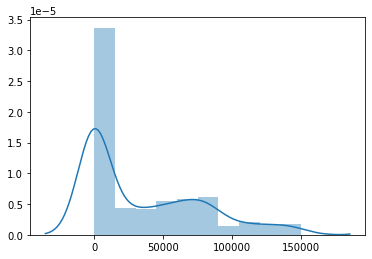

In [92]:
#histogram
sns.distplot(x);

(array([[400.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  4.,  53.,  51.,  66.,  69.,  74.,  17.,  25.,  19.,  22.]]),
 array([1.800000e+01, 1.501620e+04, 3.001440e+04, 4.501260e+04,
        6.001080e+04, 7.500900e+04, 9.000720e+04, 1.050054e+05,
        1.200036e+05, 1.350018e+05, 1.500000e+05]),
 <a list of 2 Lists of Patches objects>)

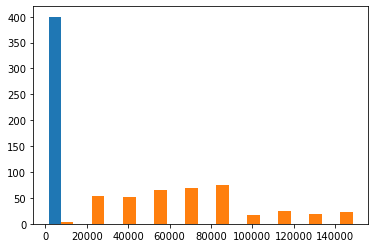

In [93]:
plt.hist(x)

In [94]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.2 , random_state =1) 

In [95]:
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(X_test)

In [96]:
Y_train.shape

(320,)

In [97]:
classifer=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
classifer.fit(x_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [98]:
y_pred=classifer.predict(x_test)
y_pred,   Y_test

(array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]))

In [99]:
cm=confusion_matrix(Y_test,y_pred)
cm

array([[42,  6],
       [ 2, 30]])

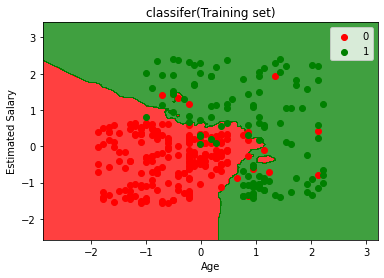

In [100]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifer.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('classifer(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

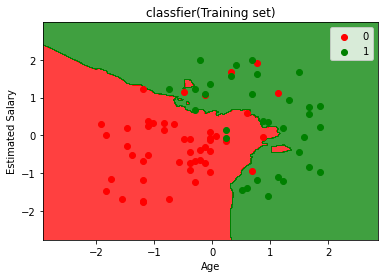

In [101]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifer.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('classfier(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()